# Hierarchical clustering

Types of clustering :-

Introduction

As the name itself suggests, Clustering algorithms group a set of data points into subsets or clusters.
The algorithms' goal is to create clusters that are coherent internally, but clearly different from each other externally.

In other words, entities within a cluster should be as similar as possible and entities in one cluster should be as dissimilar as possible from entities in another.

Broadly speaking there are two ways of clustering data points based on the algorithmic structure and operation, namely agglomerative and divisive.

Agglomerative : An agglomerative approach begins with each observation in a distinct (singleton) cluster, and successively merges clusters together until a stopping criterion is satisfied.

Divisive : A divisive method begins with all patterns in a single cluster and performs splitting until a stopping criterion is met.

agglomerative or bottom-up approach, where you start with each data point as its own cluster and then combine clusters based on some similarity measure. The idea can be easily adapted for divisive methods as well.

# Loading the libraries:

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [3]:
from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from random import shuffle

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [5]:
plt.style.use('seaborn-whitegrid')

# Loding the dataset

In [6]:
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
df.shape

(768, 9)

In [11]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Visualization
 method='single'

Z-Shape: (767, 4)


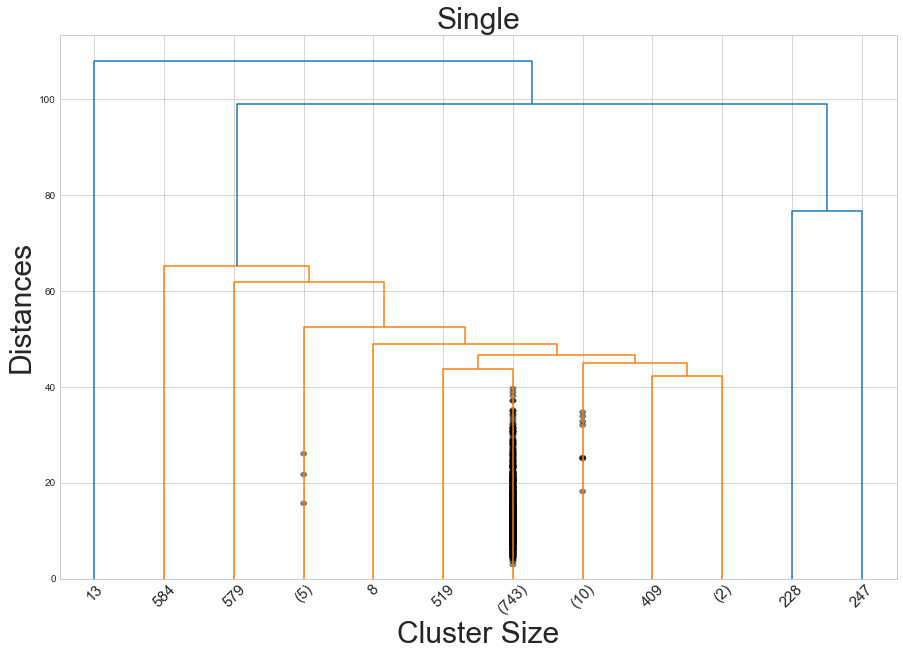

In [14]:
plt.figure(figsize=(15,10))
Z=linkage(df.drop(['Outcome'],axis=1),method='single')

print("Z-Shape:",Z.shape)
plt.title("Single",size=30)

dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=True,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)

plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

# method='complete'

Z-Shape: (767, 4)


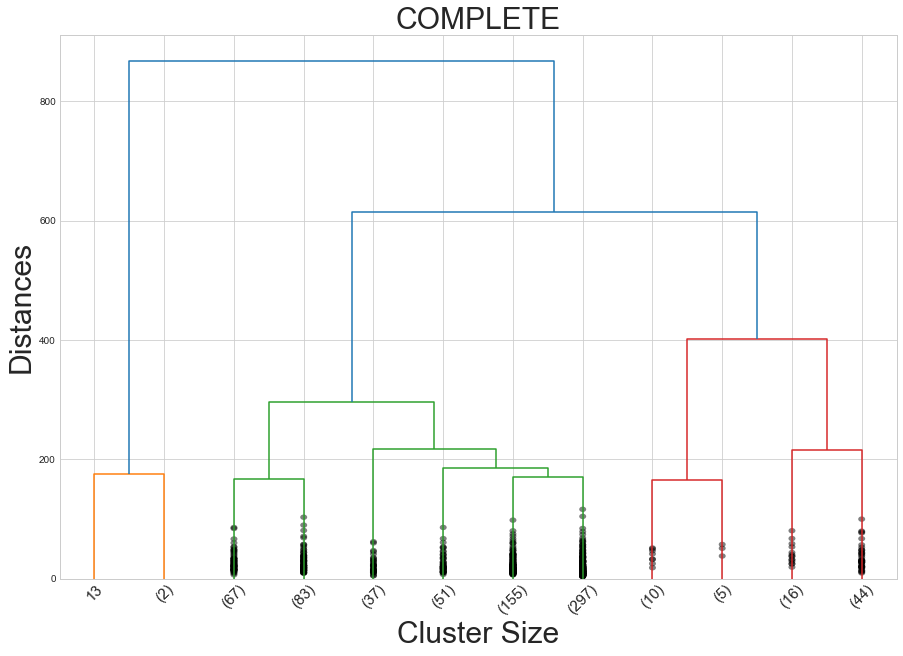

In [23]:
plt.figure(figsize=(15,10))
Z=linkage(df.drop(['Outcome'],axis=1),method='complete')
print("Z-Shape:",Z.shape)
plt.title("COMPLETE",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=True,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

# method='average'

Z-Shape: (767, 4)


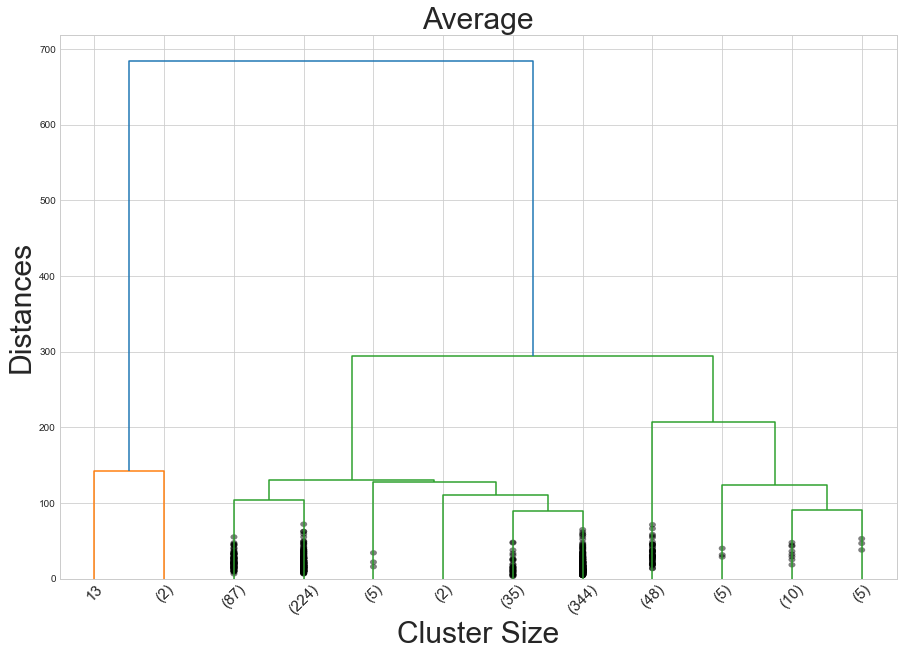

In [25]:
plt.figure(figsize=(15,10))
Z=linkage(df.drop(['Outcome'],axis=1),method='average')
print("Z-Shape:",Z.shape)
plt.title("Average",loc='center',size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=True,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

# method='weighhted'

Z-Shape: (767, 4)


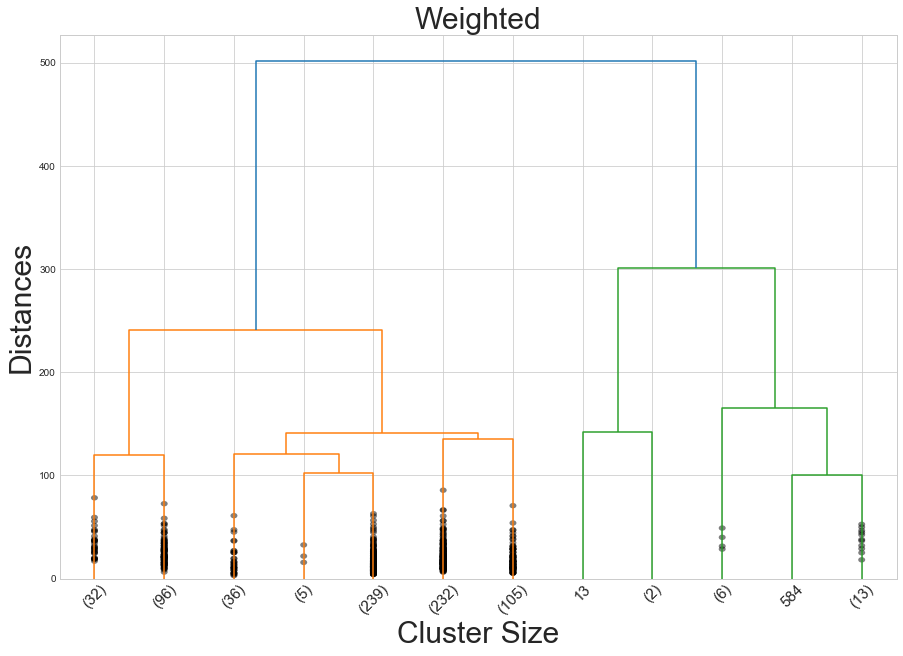

In [26]:
plt.figure(figsize=(15,10))
Z=linkage(df.drop(['Outcome'],axis=1),method='weighted')
print("Z-Shape:",Z.shape)
plt.title("Weighted",loc='center',size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=True,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

# method'centroid'

Z-Shape: (767, 4)


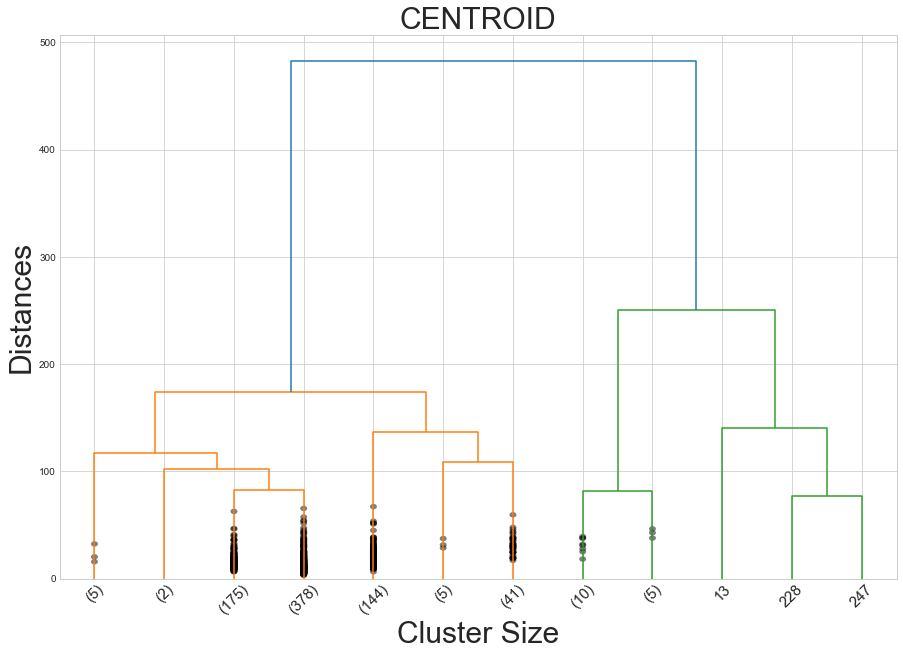

In [27]:
plt.figure(figsize=(15,10))
Z=linkage(df.drop(['Outcome'],axis=1),method='centroid')
print("Z-Shape:",Z.shape)
plt.title("CENTROID",loc='center',size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=True,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

# method='ward' uses the Ward variance minimization algorithm

Z-Shape: (767, 4)


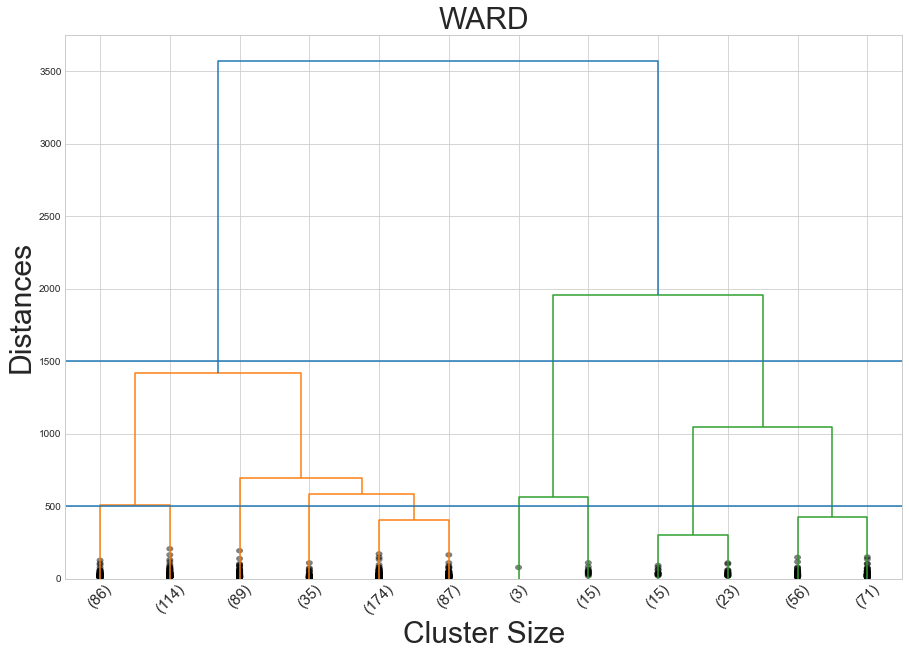

In [28]:
plt.figure(figsize=(15,10))
Z=linkage(df.drop(['Outcome'],axis=1),method='ward')
print("Z-Shape:",Z.shape)
plt.title("WARD",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=True,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.axhline(y=500)
plt.axhline(y=1500)
plt.show()